In [1]:
from __future__ import print_function

from keras.models import Model
from keras.layers import Input, LSTM, Dense
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from numpy.random import shuffle
import random
np.set_printoptions(threshold=np.inf)

batch_size = 32  # Batch size for training.
epochs = 150  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 26000  # Number of samples to train on.
# Path to the data txt file on disk.
data_path = 'many_to_one_dataset.txt'
print(epochs)

Using TensorFlow backend.


150


In [2]:
# Vectorize the data.
data_path = 'dataset(only_bigram).txt'
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')
    print(len(lines))
    print(lines[0])
    random.shuffle(lines)
    print(lines[0])
    
num_samples=37000    
for line in lines[: min(num_samples, len(lines) - 1)]:
    print(line)
    input_text, target_text = line.split('\t')
    # We use tab('\t') as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = '\t' + target_text + '\n'
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

10174
স্মৃতিকথায় ঢাকার অলিগলি-তস্যগলি—মৈশণ্ডীপাড়া,	ঢাকা
সৃষ্টিশীল জীবন ও	জীবন
সৃষ্টিশীল জীবন ও	জীবন
এ পর্যন্ত রচিত	পর্যন্ত
সাধারণ স্তরের মধ্যে	স্তর
সাফল্য কামনা করলেন।	কামনা
সামলাতে আমাকে ঠেলেই	আমা
ফর্মের উদ্ভাসন, এটি	উদ্ভাসন,
বুধবার সন্ধ্যায় মারা	সন্ধ্যা
গতকাল মঙ্গলবার এ	মঙ্গলবার
গেছে। প্রত্যক্ষদর্শী সূত্রে	প্রত্যক্ষদর্শী
মিলু বলল, ‘মা,	বল,
সঙ্গে সিনেমা দেখতে	সিনেমা
কখনো বা। সামিনা	বা।
টিভিতে উপভোগ করেছিলাম	উপভোগ
থাকলে তাঁকে সব্যসাচী	তাঁকে
ভঙ্গুর মানুষ। আলফ্রেড	মানুষ।
অর্থসহায়তা দেওয়া হয়েছে।	দেওয়া
আশপাশে পানির ব্যবস্থা	পানি
পরে স্থানীয় লোকজন	স্থানীয়
পড়ে। মুখে হাত	মুখ
৩০-৪০ জন শ্রমিক	জন
পাঁচটি পরিবারের ১৪টি	পরিবার
ওখানে বসেই। কাচের	বস।
খুঁজে পাওয়া যায়,	পাওয়া
শ্রমিক দেলোয়ার জানান,	দেলোয়ার
মন্টুর ছাত্রী তো?’	ছাত্রী
মৃত্যু হয়। মংলা	হয়।
ছাড়া আছে আরও	আছে
নাট্যচর্চার ইতিহাসেরও চকিত	ইতিহাস
ওই পাঁচটি দোকান	পাঁচ
মানিক সাইকেল দাঁড়	সাইকেল
তাঁরা বহন করবেন।	বহন
আলজেরিয়ার বিশ্ববিখ্যাত লেখিকা	বিশ্ববিখ্যাত
বিকেল সাড়ে পাঁচটার	সাড়ে
লাগে। এ নিয়ে	এ
হাসি আটকানোর সময়	আটকা
ইংরেজদের জাতীয় সত্ত

১৫৩ রানের অপরাজিত	রান
আছে। ক্রিকেটের সঙ্গে	ক্রিকেট
একচেটিয়া ছিল। সেই	ছিল।
এ ঘটনা ঘটে।	ঘটনা
হওয়ার কথা। পরবর্তী	কথা
সুধীর রায়ের সঙ্গে।	রায়
এক: সংগীত, আর:	সংগীত,
ও খুব ভালো	খুব
যাচ্ছিল। ট্রাকটি পিকআপকে	ট্রাক
সঙ্গে বিকট শব্দে	বিকট
অগ্নিকাণ্ডে ১০টি পরিবার	১০
গ্লাস কাঠের ট্রের	কাঠ
তাঁদের দাবি, মানুষটা	দাবি,
না হয় তাহলে	হয়
থাকা। তাই ক্রিকেট	তাই
মা নার্গিস আক্তারের	নার্গিস
ওস্তাদ! আমাদের কী	আমা
পল্টনের মাঠে বেড়াতে	মাঠ
খোঁপায় গাঁদা গুঁজে	গাঁদা
অপর আরোহী তার	আরোহী
ট্রাকের চাপায় এক	চাপা
কবির কবিতার ভেতরকার	কবিতা
ঐতিহাসিক মে ডে	মে
৩ ফেব্রুয়ারি সকাল	ফেব্রুয়ারি
তাই তো এখন	তা
সৈয়দ হেলাল হোসেন	হেলাল
অন্যতম একটি উপায়।	এক
সদর হাসপাতালে ভর্তি	হাসপাতাল
সাজাবুদ্দিন খানের মুদি	খান
যায় এবং মোটরসাইকেলের	এবং
ছিটকে পড়েন। এ	পড়ে।
খাতির করে।’ ‘তুমিও	কর।’
হেঁটে ঘটনাস্থলে যেতে	ঘটনা
স্থানীয় লোকজন। রাতে	লোক
প্রবন্ধে। ক্রিকেট ভারতে	ক্রিকেট
যায়। অন্যদিকে, ক্রিকেট	অন্যদিক,
হোসেন সদর উপজেলার	সদর
বাড়ি শহীদনগর ও	শহীদনগর
ইঞ্জিনিয়ারিং কোম্পানি লিমিটেডকে	কোম্পানি
গেছে। তিনি অটোরিকশার	তিনি
অবলোকন ঘটে তাঁর	ঘটা
২

বিয়ন্ড আ বাউন্ডারি	আই
শেক্সপিয়ারকে বাইবেলের পাশাপাশি	বাইবেল
বোলেন গিয়ে মাকে।’	গিয়ে
বলা হয়েছে। গতকাল	হয়েছে।
মিজানুর রহমান ঘটনার	রহমান
স্থানীয় লোকজন। নিহত	লোক।
নানা দিক থেকে	দিক
জীবনের মহত্ব (গ্রেইটনেস)	মহত্ব
ঔপনিবেশিক দেশ উপনিবেশিত	দেশ
‌বগুড়ার শেরপুরে	‌বগুড়া
করা হয়েছে। তবে	হয়।
এবং বিশাল, এ	বিশাল,
নয়। ‘জেন্টলম্যান’ বলতে	‘জেন্টলম্যান’
দুঃখ প্রকাশ করেছিলেন।	প্রকাশ
কনস্টেবলের নাম মোস্তাফিজুর	নাম
না। ফলে তাঁকে	ফলে
তাঁর অলংকরণ ও	অলংকরণ
হাওলাদার, গৌরম্ভা গ্রামের	গৌরম্ভা
পেছন ফিরে অফিসের	ফিরে
খেলার মধ্যে মিশ্রিত	মধ্য
ফিরে ফিরে আসেন	ফিরে
বর্ণনায় ভাস্বর প্রতিভা	ভাস্বর
দুর্ঘটনা ঘটেছে। ফায়ার	ঘটে
পাওয়া যাচ্ছে যে	যাচ্ছে
নাম ‘চীন জাদুঘর’।	‘চীন
মোমবাতি জ্বালান তিনি।	জ্বালান
ব্যারিস্টার সুধীর রায়ের	সুধীর
যাত্রী নিহত এবং	নিহত
বিকেলে পানির ট্যাংক	পানি
‘তুকে করে। তু	কর।
নিশ্চয় রানু? বলো	রানু?
নামক অপর একটি	অপর
তাদের এখনও উদ্ধার	এখন
মালিকানায় ১৯৯৪ সালে	১৯৯৪
আবু বক্কর সিদ্দিক।	বক্কর
কর্মীরা উদ্ধার কাজ	উদ্ধার
আজ মে মাস	মে
সবুজ জমিতে ক্রিকেট	জমি
পর্যন্ত নাইক্ষ্যংছড়ির পাঁচ	নাইক্ষ্যংছড়ি
নতুন লাল ঝলমলে	ল

দখলের জন্য একটি	জন্য
বীরত্বের এটি একটি	এটি
বিভিন্ন ক্রোড়পত্র তাঁর	ক্রোড়পত্র
বিছছাস যাস না	যাস
এক সাক্ষাৎকারে প্রতিভা	সাক্ষাৎকার
বাংলা, এ রং	এ
১০টায় জাহিদুল ইসলামসহ	জাহিদুল
লাশ উদ্ধার করা	উদ্ধার
আক্রমণকারী ও ইংরেজ	ওক্
দেখি—পাটাতনে তোমার নিঃশব্দ	তোমার
সবুজে ঘেরা কাব্যিকতার	ঘেরা
সংস্থার পক্ষ থেকে	পক্ষ
খেলায় মেতে উঠেছে	মেতে
বুদ্ধদেব বসুর আড্ডাখানা	বসু
গেছে, বুধবার দিবাগত	বুধবার
ইংরেজদের এতটা ভাবকাতর	এত
অবস্থায় উদ্ধার করা	উদ্ধার
কলকাতা যাতায়াত করতেন	যাতায়াত
পয়সা লাগে না?’	লাগে
লজ্জায় নতমুখী হয়ে	নতমুখ
এত যে প্লাবন,	যে
ঢাকা থেকে গাজীপুরগামী	থেকে
আজ শুক্রবার দুপুরে	শুক্রবার
তিনি তখন বীরাষ্টমী	তখন
দেশে বট পরিবারের	বট
সে মেথর, সে	মেথর,
দোকানি। দুলে ওঠে	দুলে
সাম্রাজ্যবাদের বিস্তৃতির ইতিহাসে	বিস্তৃতি
তখন ইংরেজ শাসকবর্গ	ইংরেজ
কৌতূহলে ফেটে পড়ল	ফেট
অবয়ব। কাইয়ুম চৌধুরীর	কাইয়ুম
নাহি আঁখি পাতে’	আঁখি
করে যদি ওই	যদি
হয়ে গেল। তারপর	গেল
মোস্তাফিজুর সিরাজগঞ্জ পুলিশ	সিরাজগঞ্জ
সামিনা লোক ঐতিহ্যের	লোক
দিয়ে তাকাতেই সে	তাকাত
কর্মের তাৎপর্য বিবেচনায়	তাৎপর্য
জীবনের অধিকারী। এ	অধিকারী।
শিল্পালয় ও গুলশান

মানিক তুর মরদ।	তুর
না সে। ওর	সে।
সাঁতার তার তো	তার
আহত হয়েছেন। রাত	হয়।
বিশ্ববিদ্যালয়ের জগন্নাথ হলে	জগন্নাথ
স্বাভাবিক, স্বাপ্নিক।’ জেলে	স্বাপ্নিক।’
তিনি। উইম্যান অব	উইম্যান
যায়, যেখানে দীর্ঘদিনের	যেখান
আগুনে পুড়ে ছাই	পুড়ে
বেড়ে সাতজনে পৌঁছাল।	সাত
হুদা চৌধুরীও (তবু	চৌধুরী
তাঁর প্রতি পৃষ্ঠার	প্রতি
করায় ডোরাকাটা সাপের	ডোরাকাটা
কত ঘইষব গো	ঘষব
ফেলতাম, গুঁড়ো করে	গুঁড়ো
অর্জন থেকে বঞ্চিত	থেকে
নাটক মঞ্চায়নের ঐতিহাসিক	মঞ্চায়ন
চৌধুরীর এই প্রদর্শনী	এই
রানু সোমই উত্তরকালে	সোম
হবে, এ আমাদের	এ
যে ৬ পাউন্ড	৬
বিখ্যাত হয়ে গেলাম।	হয়
ছিল। এই রেকর্ডটি	এই
ছেলে শিখর আহমেদ	শিখর
সাহিত্য পুরস্কারে। সূত্র:	পুরস্কার।
জোর দিতেন বিষয়বস্তুর	দিত
পোপ তাঁর কাব্য	তাঁর
ঘটনাস্থলেই অটোরিকশার যাত্রী	অটোরিকশা
তিনজনের পরিচয় মিলেছে।	পরিচয়
তখন সাম্রাজ্যবাদী চেহারা	সাম্রাজ্যবাদী
করেছেন তিনি। উইম্যান	তিনি
১৮৫১ সালে প্রকাশিত	সাল
মেথর’ বলে খ্যাপাত,	বল
পর থেকে মরিয়মের	থেকে
করতে তখন আমাকে	তখন
উদ্ধার করা হয়।	করা
করে। বিপ্লবমুখর ঢাকার	বিপ্লবমুখ
হচ্ছে ত্রিনিদাদের মার্ক্সবাদী	ত্রিনিদাদ
সেটা তদন্ত করে	তদন্ত
বাসে পেট্রোল বোম

সাইকেল টেনে নিয়ে	টেনে
বসু তাঁর অন্তিম	তাঁর
প্রকাশক: প্রথমা প্রকাশন	প্রথমা
বদরুল হুদা চৌধুরীও	হুদা
দিদিমনি?’ ‘বেলাল চাচা	‘বেলাল
ও লিলি চৌধুরী	লিলি
মংলা সিমেন্ট ফ্যাক্টরি	সিমেন্ট
জাহেদুল বনপাড়া মডেল	বনপাড়া 
যাচ্ছি।’—কথাটি বলার পর	বলা
যেখানে দীর্ঘদিনের পুরুষশাসিত	দীর্ঘদিন
সালে ব্রায়ান লারার	ব্রায়ান
আগুন নেভায়। দমকল	নেভায়।
সহায়তার জন্য উপজেলা	জন্য
সংস্পর্শে এসে এমন	এসে
ভূমিকায়; জাতীয় জীবনের	জাতীয়
এলাকায় আজ ভোর	আজ
ও ফর্মের উদ্ভাসন,	ফর্ম
বগুড়ার শহীদ জিয়াউর	শহীদ
লাউঞ্জে শিল্পীর দুটি	শিল্পী
দুটো ইট পেতে	ইট
শিখিয়েছিলেন’ (প্রথম আলো,	প্রথম
(এএসআই) জাহিদুল ইসলাম	জাহিদুল
সূত্র: ল্য মঁদ	ল্য
সাহিত্যে স্থান পেয়েছে,	স্থান
২০ জন আহত	জন
বাড়ি বগুড়ার সারিয়াকান্দি	বগুড়া
যানটি। কিংকর্তব্যবিমূঢ় মানিক	কিংকর্তব্যবিমূঢ়
শ্রমিক নিয়ে ১৪	নিয়ে
এখনো ধুলো রয়েছে।’	ধুলো
না কেন! এর	কেন!
গ্রন্থের লেখক অ্যান্টনি	লেখক
মুনীর চৌধুরী ও	চৌধুরী
লিলি চৌধুরী, তাঁর	চৌধুরী,
রয়েছেন বলে দাবি	বল
অর্থাৎ ভারতীয়রা পেতেন	ভারত
করতে গিয়ে মহাদেবপুর	গিয়ে
ছিলেন এবং অন্যরা	এবং
বর্ণনা এই নগরের	এই
ঠিক ধরেছি কি	ধর
বৃদ্ধার নাম আ

বাইবেলের পাশাপাশি তাদের	পাশাপাশি
বিচার বটে, একেবারে	বটে
জেলা প্রশাসক মো.	প্রশাসক
প্রধান নয়, আবহমান	নয়
রং আমার বাংলার	আমার
তবে হাঁটেননি বিমূর্তায়নের	হাঁটেন
শীর্ষক প্রবন্ধে তিনি	প্রবন্ধ
একটি পত্রিকার কলামে	পত্রিকা
ব্যক্তিদের চিকিৎসার ব্যয়ভারও	চিকিৎসা
লোক ঐতিহ্যের অনুসারী।	ঐতিহ্য
চিত্রমালায় দেখা যায়	দেখা
কনস্টেবল শহিদুল ইসলামকে	শহিদুল
পাশে। ‘ই বেলা	‘ই
রাজার একটি বাড়ি	এক
ক্যাম্প কমান্ডার সুবেদার	কমান্ডার
ছিলেন সহরাজবন্দীদের দ্বারা।	সহরাজবন্দী
ঘাটে ভিড়ছিল। ভেড়ার	ভিড়ে
অলিগলি-তস্যগলি—মৈশণ্ডীপাড়া, বকশিবাজার, যোগিনগর,	বকশিবাজার,
তোমাকে ঘিরেই ঘটে	ঘির
মানিকের অসহায় মুখের	অসহায়
অনুমতিপত্র দিয়ে আমাদের	দিয়
হাতে সে চেপে	সে
প্রাক্প্রস্তুতির কাজটি এভাবেই	কাজ
ভেড়া পর্যন্ত কোনো	পর্যন্ত
জন নিহত ও	নিহত
অন্যান্য’ শিরোনামে ১১টি	শিরোনাম
সেনা কল্যাণ সংস্থার	কল্যাণ
যদি ভাসি একসঙ্গে,	ভাসি
পরিবারকে এক লাখ	এক
মানুষকে সঙ্গে নিয়ে	সঙ্গ
বেলাল কেরানির পক্ষে	কেরানি
তাকাতেই সে বলল,	সে
ব্যবহারের ক্ষেত্রেও হয়েছে	ক্ষেত্র
স্মৃতিকথায় ঢাকার অলিগলি-তস্যগলি—মৈশণ্ডীপাড়া,	ঢাকা
বলেছিলেন কার্লাইল, অন্যভাবে,	কার্লাইল
নাটক

বীরত্ব প্রতিভাত ছিল।	প্রতিভাত
চৌদ্দ যেয়ে পনেরো	যে
সৌধ গড়ে তোলা।	গড়ে
শুক্রবার রাতে বরযাত্রীবাহী	রাত
দাবি করেছেন আহত	কর
এখানেও ব্রিটিশ রাজ্যের	ব্রিটিশ
মাধ্যমে কর্মজীবনের হাতেখড়ি;	কর্মজীবন
খেলাটিকে জাতীয় ক্রীড়ায়	জাতীয়
সহকারী উপপরিদর্শক (এএসআই)	উপপরিদর্শক
মাদ্রাসা রোড বিকল্প	রোড
বাগেরহাটে পাঠানো হয়েছে।	পাঠানো
গেল। তারপর দুরু	তারপর
গতর এই শব্দ	এই
রহমান মেডিকেল কলেজ	মেডিকেল
করে। বাংলাদেশি এই	বাংলাদেশ
ছোট কাগজ কালের	কাগজ
এই পাণ্ডিত্যের অসাধারণত্বে	পাণ্ডিত্য
বৃহস্পতিবার সেনাকল্যাণ সংস্থার	সেনাকল্যাণ
১৯৯৬ সালে তিনি	সাল
আজ বুধবার সন্ধ্যায়	বুধবার
সবচেয়ে ভদ্রপাড়া ওয়ারী’,	ভদ্রপাড়া
তিনি বামপন্থী রাজনীতি	বামপন্থী
খিলখিল করে হেসে	কর
মুণ্ডা, এই মানিক	এই
ব্র্যান্ড নামে সিমেন্ট	নামে
পুড়ে যায়। পরে	যায়।
চৌধুরী তাঁর ‘দিনপঞ্জি-মনপঞ্জি’	তাঁর
যাওয়ার পথে ললিতা	পথ
যেন গোয়েন্দা কাহিনিকেও	গোয়েন্দা
এবং মোটরসাইকেলের অপর	মোটরসাইকেল
ঝলমলে মালা শাড়ি।	মালা।
দাঙ্গা-সন্ত্রাসবিরোধী ওয়ারী অভিযানের	ওয়ারী
এতে বাসটি রাস্তার	বাস
না। ভাবকাতরতার পরম	ভাবকাতর
প্লাবন, দাহ, সুনামি-প্রলয়—তারপরও	দাহ,
তথ্য। চীনের চলচ্চ

ইন্টারন্যাশনাল ইঞ্জিনিয়ারিং কোম্পানি	ইঞ্জিনিয়ারিং
ভর্তি করা হয়েছে।	করা
বিপ্লবী গেরিলা কায়দায়	গেরিলা
আগুন দুটো ক্যাম্পের	দুটা
ঘন কালো কোঁকড়া	কালো
তিনজনই ট্রেনের যাত্রী	ট্রেন
এলাকার আল আমিন।	আল
ক্রিকেটে মেতে উঠেছে	মেতে
ঘটনাস্থলে গিয়ে আগুন	গিয়ে
এসেছিলে একা এইখানে,	একা
এডওয়ার্ডের (পরবর্তী সময়ে	(পরবর্তী
ট্রাক তাঁকে চাপা	তাঁকে
ঘটনা ঘটে। এতে	ঘটে।
অলীন দুষ্টুমিতে ওস্তাদ!	দুষ্টুমি
অজ্ঞাত একজন। পুলিশ	এক।
বিজয়িনীর হাসি হাসে	হাসি
মাধুর্যের সঙ্গে কাইয়ুমের	সঙ্গ
আর কোনটা হাসির,	কোন
গত মঙ্গলবার রাতে	মঙ্গলবার
আগুন থেকে অগ্নিকাণ্ডের	থেকে
ক্রিকেটের অবস্থান। শেক্সপিয়ারের	অবস্থান।
মাইজপাড়া এলাকায় দাঁড়িয়ে	এলাকা
বালতি আর ঝাঁটা	আর
মহাদেবপুর উপজেলার আখেড়া	উপজেলা
জিয়াউর রহমান মেডিকেল	রহমান
ক্রিকেটীয় বীরত্বের এটি	বীরত্ব
একটি গুদামের ছাদ	গুদাম
উপস্থিত রশীদ চৌধুরীর	রশীদ
সে। ওর বুকে	ওর
সিং ‘বাবার কথা’	‘বাবা
সাইকেলের হ্যান্ডেলে তার	হ্যান্ডেল
দিকে পুরানা পল্টনের	পুরানা
আমার মুখের দিকে।	মুখ
কর্মীরা উদ্ধারকাজ শুরু	উদ্ধারকাজ
এর বর্ণনা আছে	বর্ণনা
৬৪০ মিলিয়ন ডলার।	মিলিয়ন
দুজন হলেন সদর	হল
রানু? বলো ঠিক	বল


শাহজাহান পাশা বলেন,	পাশা
নিষ্ঠুর ভাষার সৌকর্যে।	ভাষা
এবং অন্যরা ভবনের	অন্য
গাছপালা, সবজিখেত পুড়ে	সবজিখেত
ধুতুরা ফুলের মতো	ফুল
বিয়ে হয়ে গেছে।	হয়
প্রশাসক বটে! এমন	বটে
গল্প-উপন্যাস-স্মৃতিকথা পাঠে যেমন	পাঠ
আদি থেকে বর্তমান।	থেকে
জন্য। বিকেল গড়িয়ে	বিকেল
বর্ধমান হাউস আর	হাউস
প্রতীক, সেটি এখন	সেটি
কার্ডাসের প্রামাণিক লেখাগুলো	প্রামাণিক
কিছু। যেমন, বিলেত	যেমন
ভবনের নির্মাণকাজ শেষ	নির্মাণকাজ
লাগবে। বেলাল চাচা	বেলাল
বাড়িতে খেতে চায়	খেত
যাওয়া বৃদ্ধার নাম	বৃদ্ধা
রেডিও ঝুলিয়ে অকারণে	ঝুলি
করে সে। ঘরে	সে।
এবং ৩৮ জন	৩৮
তিনি। তাঁর সঙ্গে	তাঁর
সিমেন্ট কারখানার উপমহাপরিচালক	কারখানা
যে খেলায় তিনি	খেলা
বার্ণ ইউনিটে চিকিৎসাধীন	ইউনিট
বেগবান। সেই বয়সে	সেই
সেতু পশ্চিম সংযোগ	পশ্চিম
(ওসি) খন্দকার রেজাউল	খন্দকার
গড়িয়ে পড়ে ললিতা।	পড়ে
যোগাযোগ একেবারে ক্ষীণ	একেবার
আর ঝাঁটা হাতে	ঝাঁটা
খেলায় মুক্তিযোদ্ধার বীরত্ব	মুক্তিযোদ্ধা
করে না। ভাবকাতরতার	না।
পাঁচটি দোকান পুড়ে	দোকান
বাড়ির পানির রিজার্ভ	পানি
বর্তমান। সেই কবে	সেই
নিয়ে নওগাঁ শহরে	নওগাঁ
গুল মোহাম্মদ খাঁ,	মোহাম্মদ
ছাত্রী তো?’ মন্টু	তো?’
ঘর, ঘরে রক্ষ

In [3]:
input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

print(input_characters)
print(target_characters)

Number of samples: 10173
Number of unique input tokens: 93
Number of unique output tokens: 93
Max sequence length for inputs: 63
Max sequence length for outputs: 24
[' ', '!', "'", '(', ')', ',', '-', '.', '/', ':', ';', '?', '|', '\xad', '²', '।', 'ঁ', 'ং', 'ঃ', 'অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ', 'ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', '়', 'া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ে', 'ৈ', 'ো', 'ৌ', '্', 'ৎ', 'ৗ', 'ড়', 'য়', '০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯', '\u200c', '—', '‘', '’', '\ufeff']
['\t', '\n', ' ', '!', '(', ')', ',', '-', '.', '/', ':', ';', '?', '\xad', '।', 'ঁ', 'ং', 'ঃ', 'অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ', 'ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', '়', 'া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ে', 'ৈ', 

In [4]:
import json

data = {}  
data['input_output'] = []  
data['input_output'].append({  
    'num_encoder_tokens': num_encoder_tokens,
    'num_decoder_tokens': num_decoder_tokens,
    'max_encoder_seq_length': max_encoder_seq_length,
    'max_decoder_seq_length': max_decoder_seq_length
})

with open('important_data(only_bigram_test).txt', 'w') as outfile:  
    json.dump(data, outfile)

In [5]:
input_token_index = dict(
    [(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict(
    [(char, i) for i, char in enumerate(target_characters)])

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.

In [7]:
import json

print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

data = {}  
data['input_output'] = []  
data['input_output'].append({  
    'num_encoder_tokens': num_encoder_tokens,
    'num_decoder_tokens': num_decoder_tokens,
    'max_encoder_seq_length': max_encoder_seq_length,
    'max_decoder_seq_length': max_decoder_seq_length
})

data['input_index']=input_token_index;
data['target_index']=target_token_index;

with open('important_data(only_bigram_test).txt', 'w') as outfile:  
    json.dump(data, outfile)
    
#with open('important_data.txt', 'a') as outfile:  
 #   json.dump(input_token_index, outfile)   

Number of unique input tokens: 93
Number of unique output tokens: 93
Max sequence length for inputs: 63
Max sequence length for outputs: 24


In [8]:
all_char=[]
print(input_token_index)
print(target_token_index)
print(input_token_index['ক'])
print(np.shape(encoder_input_data))

{' ': 0, '!': 1, "'": 2, '(': 3, ')': 4, ',': 5, '-': 6, '.': 7, '/': 8, ':': 9, ';': 10, '?': 11, '|': 12, '\xad': 13, '²': 14, '।': 15, 'ঁ': 16, 'ং': 17, 'ঃ': 18, 'অ': 19, 'আ': 20, 'ই': 21, 'ঈ': 22, 'উ': 23, 'ঊ': 24, 'ঋ': 25, 'এ': 26, 'ঐ': 27, 'ও': 28, 'ঔ': 29, 'ক': 30, 'খ': 31, 'গ': 32, 'ঘ': 33, 'ঙ': 34, 'চ': 35, 'ছ': 36, 'জ': 37, 'ঝ': 38, 'ঞ': 39, 'ট': 40, 'ঠ': 41, 'ড': 42, 'ঢ': 43, 'ণ': 44, 'ত': 45, 'থ': 46, 'দ': 47, 'ধ': 48, 'ন': 49, 'প': 50, 'ফ': 51, 'ব': 52, 'ভ': 53, 'ম': 54, 'য': 55, 'র': 56, 'ল': 57, 'শ': 58, 'ষ': 59, 'স': 60, 'হ': 61, '়': 62, 'া': 63, 'ি': 64, 'ী': 65, 'ু': 66, 'ূ': 67, 'ৃ': 68, 'ে': 69, 'ৈ': 70, 'ো': 71, 'ৌ': 72, '্': 73, 'ৎ': 74, 'ৗ': 75, 'ড়': 76, 'য়': 77, '০': 78, '১': 79, '২': 80, '৩': 81, '৪': 82, '৫': 83, '৬': 84, '৭': 85, '৮': 86, '৯': 87, '\u200c': 88, '—': 89, '‘': 90, '’': 91, '\ufeff': 92}
{'\t': 0, '\n': 1, ' ': 2, '!': 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, '/': 9, ':': 10, ';': 11, '?': 12, '\xad': 13, '।': 14, 'ঁ': 15, 'ং': 16, 'ঃ': 17, '

In [9]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [10]:
# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
epochs=20
print(epochs)
# Run training
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])sparse_categorical_crossentropy
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True,
          validation_split=0.2)
# Save model
model.save('s2s(only_bigram_test).h5')

20
Train on 8138 samples, validate on 2035 samples
Epoch 1/20
8138/8138 [==============================] - 114s 14ms/step - loss: 0.7636 - acc: 0.0530 - val_loss: 0.7143 - val_acc: 0.0569
Epoch 2/20
8138/8138 [==============================] - 107s 13ms/step - loss: 0.6919 - acc: 0.0611 - val_loss: 0.6571 - val_acc: 0.0633
Epoch 3/20
8138/8138 [==============================] - 102s 12ms/step - loss: 0.6460 - acc: 0.0699 - val_loss: 0.6230 - val_acc: 0.0699
Epoch 4/20
8138/8138 [==============================] - 101s 12ms/step - loss: 0.6158 - acc: 0.0770 - val_loss: 0.6038 - val_acc: 0.0743
Epoch 5/20
8138/8138 [==============================] - 102s 13ms/step - loss: 0.5948 - acc: 0.0821 - val_loss: 0.5870 - val_acc: 0.0820
Epoch 6/20
8138/8138 [==============================] - 101s 12ms/step - loss: 0.5763 - acc: 0.0866 - val_loss: 0.5868 - val_acc: 0.0808
Epoch 7/20
8138/8138 [==============================] - 103s 13ms/step - loss: 0.5572 - acc: 0.0914 - val_loss: 0.5574 - val_ac

C:\Users\RANA_CSE\Anaconda3\lib\site-packages\keras\engine\topology.py:2361: UserWarning: Layer lstm_2 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'lstm_1/while/Exit_2:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'lstm_1/while/Exit_3:0' shape=(?, 256) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '


In [11]:
# Next: inference mode (sampling).
# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

# Define sampling models
data_path = 'many_to_one.txt'
print("kire")
model = load_model('s2s(only_bigram).h5')


encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index[' ']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence




def get_input_data(test_txt):
    #txt = input()
    txt=test_txt
    
    encoder_input_data = np.zeros(
    (len(txt), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
    
    txt = txt.replace(' ', '')
    
    for t, char in enumerate(txt):
        encoder_input_data[0, t, input_token_index[char]] = 1.
        
    return encoder_input_data
    
    
    
    
# Take one sequence (part of the training set)
# for trying out decoding.
#input_seq = encoder_input_data[seq_index: seq_index + 1]

with open(data_path, 'r', encoding='utf-8') as f:
    test_lines = f.read().split('\n')

test_input_texts=[]
test_target_texts=[]
for line in test_lines[1: 100]:
    test_input_text, test_target_text = line.split('\t')
    test_input_texts.append(test_input_text)
    test_target_texts.append(test_target_text+'\n')
    
#print(test_input_texts)   

total_test_input=0
total_accuracy=0

for i in range(100):
    total_test_input=total_test_input+1
    input_seq = get_input_data(test_input_texts[i])
    decoded_sentence = decode_sequence(input_seq)
    if (decoded_sentence==test_target_texts[i]):
        total_accuracy=total_accuracy+1
        #print('hoiche')
        
    print('Input sentence:',   test_input_texts[i])
    print('Decoded sentence:', decoded_sentence)
    #print(decoded_sentence[6])
   # print('Target sentence:',  test_target_texts[i])
    #print(test_target_texts[i][6])
  
    
print('total_test_input:', total_test_input)
print('total_accuracy:', total_accuracy)
print('result:', (total_accuracy/total_test_input)*100,'%')

#yhat = model.predict(input_seq, verbose=0)
#print(yhat)

kire
Input sentence: জলছবিতে। বিনয়-বাদল-দীনেশ বাহিনীর
Decoded sentence: 

Input sentence: বিনয়-বাদল-দীনেশ বাহিনীর দাঙ্গা-সন্ত্রাসবিরোধী
Decoded sentence: 

Input sentence: বাহিনীর দাঙ্গা-সন্ত্রাসবিরোধী ওয়ারী
Decoded sentence: 

Input sentence: দাঙ্গা-সন্ত্রাসবিরোধী ওয়ারী অভিযানের
Decoded sentence: 

Input sentence: ওয়ারী অভিযানের চাঞ্চল্যকর
Decoded sentence: 

Input sentence: অভিযানের চাঞ্চল্যকর বর্ণনায়
Decoded sentence: 

Input sentence: চাঞ্চল্যকর বর্ণনায় ভাস্বর
Decoded sentence: 

Input sentence: বর্ণনায় ভাস্বর প্রতিভা
Decoded sentence: 

Input sentence: ভাস্বর প্রতিভা বসুর
Decoded sentence: 

Input sentence: প্রতিভা বসুর স্মৃতির
Decoded sentence: 

Input sentence: বসুর স্মৃতির কলম।
Decoded sentence: 

Input sentence: স্মৃতির কলম। পাড়া-মহল্লার
Decoded sentence: 

Input sentence: কলম। পাড়া-মহল্লার মানুষকে
Decoded sentence: 

Input sentence: পাড়া-মহল্লার মানুষকে সঙ্গে
Decoded sentence: 

Input sentence: মানুষকে সঙ্গে নিয়ে
Decoded sentence: 

Input sentence: সঙ্গে নিয়ে জনা
Decode

IndexError: list index out of range

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


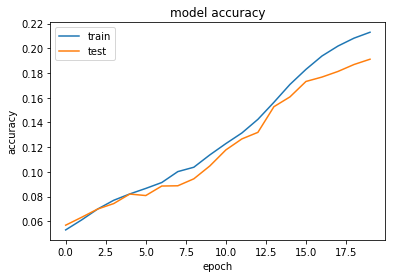

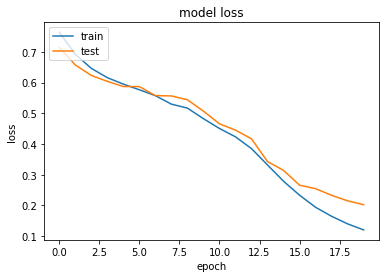

In [12]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()